<a href="https://colab.research.google.com/github/nika-va/practice/blob/main/2_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"x0": x[:,0], "x1": x[:,1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


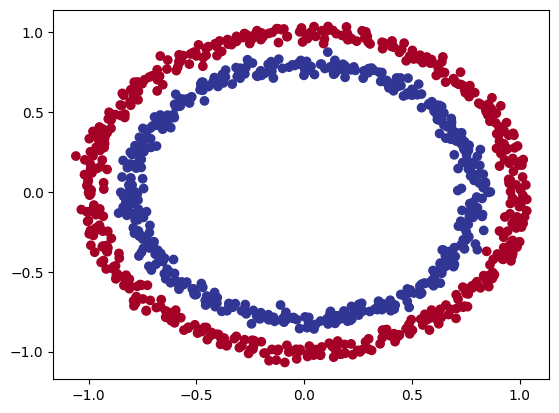

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
x_train.shape

(800, 2)

In [9]:
import tensorflow as tf

model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(None, 2)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
history = model_1.fit(x_train, y_train, epochs=50, verbose=0)

In [10]:
model_1.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.9900


[0.4449113607406616, 0.9900000095367432]

<Axes: >

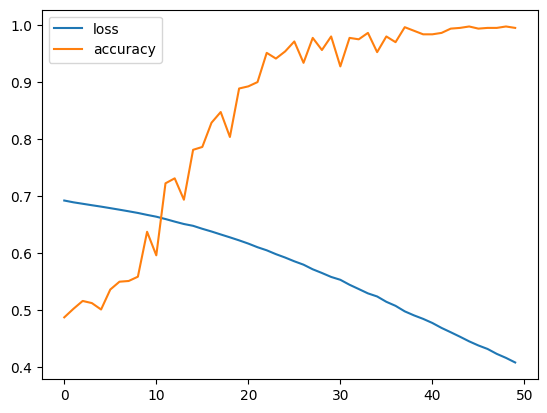

In [11]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, x, y):
  x_min, x_max = x[:,0].min()-0.1, x[:,0].max()+0.1
  y_min, y_max = x[:,1].min()-0.1, x[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:,0], x[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step


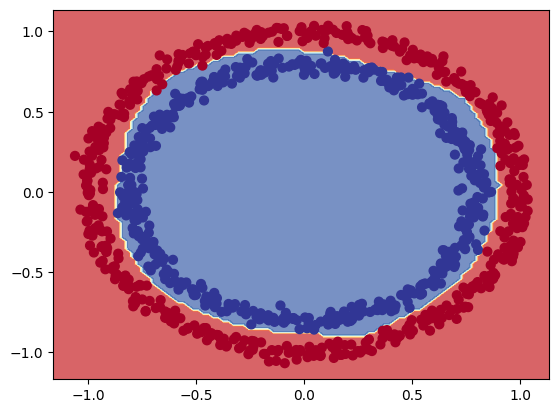

In [13]:
plot_decision_boundary(model_1, x, y)

In [14]:
tf.random.set_seed(42)

x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100,1100, 5)

x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# model_1.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

In [15]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)
model_2.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 423.7408 - mae: 423.7408
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 283.2005 - mae: 283.2005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 146.3434 - mae: 146.3434
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 51.8728 - mae: 51.8728
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 90.8094 - mae: 90.8094
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 76.3651 - mae: 76.3651
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 44.2498 - mae: 44.2498
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 53.3497 - mae: 53.3497
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 42.0469 - mae: 42.0469
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 45.6596 - mae: 45.6596
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 9ms/step


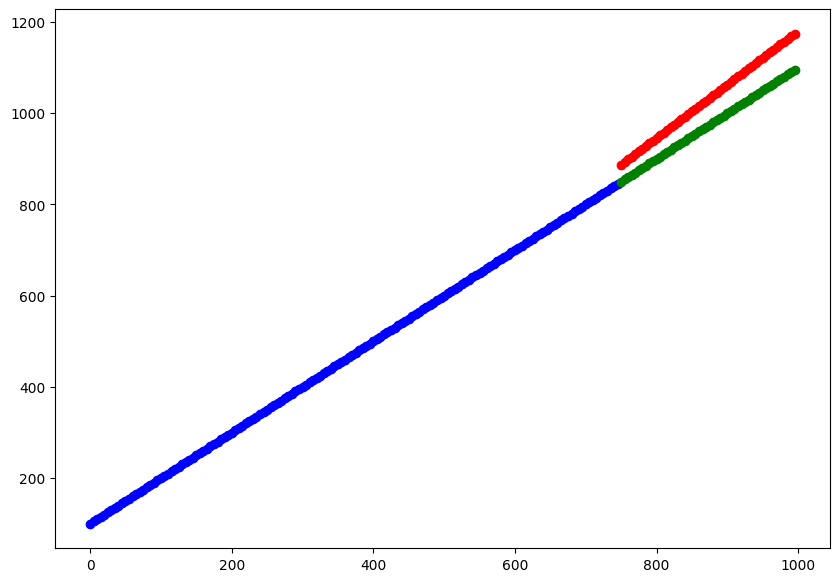

In [16]:
y_reg_preds = model_2.predict(x_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c = 'b', label="training data")
plt.scatter(x_reg_test, y_reg_test, c = 'g', label="test data")
plt.scatter(x_reg_test, y_reg_preds, c = 'r', label="prediction data")

In [17]:
a = tf.cast(tf.range(-10, 10), tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5025 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5050 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5038 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5038 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5063 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: >

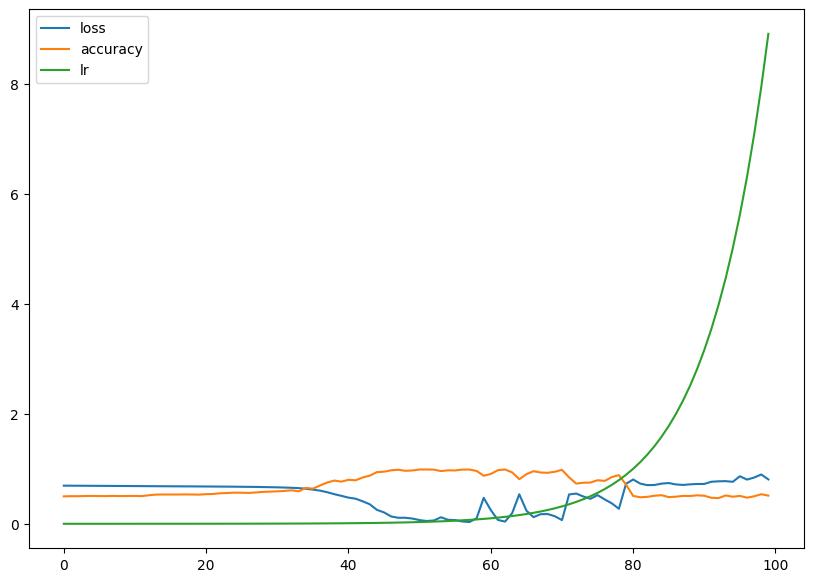

In [21]:
pd.DataFrame(history.history).plot(figsize=(10,7))